In [1]:
model_file  = "../models/europe.json"
run_dir     = "data/TOPF_run"
result_file = "P_result_10"

"P_result_10"

In [2]:
using TemperateOptimalPowerFlow
using DataFrames, CSV, JSON
using Statistics, Plots

In [3]:
network = import_model(model_file)

Dict{String, Any} with 11 entries:
  "bus"      => Dict{String, Any}("4304"=>Dict{String, Any}("coord"=>Any[11.843…
  "name"     => "europe"
  "dcline"   => Dict{String, Any}()
  "gen"      => Dict{String, Any}("1"=>Dict{String, Any}("entsoe_names"=>Any[],…
  "branch"   => Dict{String, Any}("4304"=>Dict{String, Any}("br_r"=>0.00174284,…
  "storage"  => Dict{String, Any}()
  "switch"   => Dict{String, Any}()
  "baseMVA"  => 100
  "per_unit" => true
  "shunt"    => Dict{String, Any}()
  "load"     => Dict{String, Any}("4304"=>Dict{String, Any}("load_bus"=>4304, "…

# Generators

In [4]:
gens = DataFrame(retrieve_gen_results(run_dir, result_file)', get_ordered_gen_ids(network))

Row,1,2,3,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,81,82,86,87,88,89,90,94,96,97,98,99,100,101,102,103,104,108,109,110,111,112,113,114,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1.14,1.10358,0.0,0.460034,1.16625,0.498939,4.0,2.44275,2.64091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.11585,0.0,0.485015,0.059429,1.6845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.88043,7.0784,0.107044,0.0,0.0,1.58547,0.0,1.88585,0.0,0.0,0.0,0.0,0.728961,0.0,0.0,1.06338,0.0,0.0,0.0,0.719638,0.0,1.21424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,1.33103,0.536137,0.0,0.0,1.89,0.96,2.70586,0.7017,0.0,0.0,3.12191,4.14051,0.0,19.7042,0.0,0.904411,0.0,10.624,0.0,0.0,2.5,0.187675,1.26465,0.51,0.0,2.4,6.41869,0.280864,0.551661,0.0,0.0,0.0,0.0,2.2,0.0,3.50088,0.0,3.7845,⋯
2,1.14,1.54979,0.0,0.509914,2.61139,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0988477,0.261819,0.246691,3.78751,0.509724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.88043,6.92773,0.753417,0.0,0.0,0.0,0.0,0.329756,0.470626,0.0,0.0,0.0,0.240756,0.0,0.0,0.0,0.0,0.0,0.0,0.415972,0.0,1.00356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.824313,1.21665,0.0,0.0,1.89,0.96,2.44059,0.0900828,0.0,0.0,3.69676,6.46391,0.0,19.7052,0.0,0.0,0.0,10.623,0.0,0.0,2.5,0.0,0.969276,0.51,0.0,2.4,4.56417,0.766121,0.361825,0.0,0.0,0.0,0.0,2.2,0.0,1.91464,1.44,1.65637,⋯
3,0.873803,1.6,0.0,0.6,1.89754,0.0,0.0,2.22712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561055,0.0,0.0,2.09885,0.0,0.0,2.60022,0.851911,0.356897,0.0,0.0,0.0,0.0,0.0,1.29768,4.88043,4.92773,1.99218,0.0,0.976788,0.929957,0.0,0.0,0.800886,0.0,0.0,0.0,0.802029,0.0,0.0,0.0,0.0,0.0,0.0,0.404783,0.0,0.434756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367991,1.18227,1.5,0.0,0.0,1.89,0.96,4.44059,0.0277341,0.0,0.0,5.99438,2.83461,0.0,19.7062,0.0,0.0,0.0,10.629,0.0,0.0,2.5,0.0,1.48459,0.51,0.54,2.4,5.98467,1.58148,0.0,0.0,0.0,0.0,0.636835,2.2,0.0,2.65462,0.0,0.0,⋯
4,1.14,1.6,0.0,0.6,3.50052,0.0,1.08339,1.64194,0.91129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94281,0.0,0.0,2.45041,0.0,0.0,0.811083,0.472439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.05938,2.92773,0.0,0.0,2.97679,2.69066,0.0,0.0,0.0,0.0,0.0,0.0,0.285947,0.0,0.0,0.0,0.0,0.0,0.0,0.63505,0.0,1.03522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,2.41474,0.985884,0.0,0.0,0.0,0.96,4.77725,0.0,0.0,0.0,2.86639,1.58233,0.0,19.7062,0.0,0.0,0.0,10.629,0.0,0.0,2.5,0.0,1.26579,0.51,0.0,0.616903,5.63373,1.20426,0.0,0.0,0.0,0.0,0.0,2.2,0.0,2.38879,0.0,0.0,⋯
5,1.14,1.6,0.0,0.6,5.13841,0.0,1.91205,0.0,1.34664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6018,0.0,0.0,3.29999,0.985668,0.529406,2.72042,1.36728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.05938,4.32931,2.0,0.0,1.35792,3.95019,0.0,0.0,0.0,0.0,0.0,0.0,0.545044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.6747,0.674071,0.0,0.0,0.0,0.96,4.94858,0.0,0.0,0.0,1.86088,0.918256,0.0,19.7022,0.0,0.0,0.0,10.636,0.0,0.0,0.700457,0.0,0.0434636,0.51,0.0,0.0,7.23101,0.184753,0.587924,0.0861152,0.0,0.0,2.23723,2.2,0.0,0.0,0.0,0.89259,⋯
6,1.14,1.6,0.0,0.6,1.97244,0.237749,3.21074,0.394377,3.336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.34856,0.0,0.0,3.3,4.23075,0.0,3.47986,1.79361,0.0,0.0,0.0,0.0,0.644561,0.0,0.0,4.05938,6.329

In [5]:
CSV.write("data/gens.csv", gens)

"data/gens.csv"

Check: generator output is always less than its capacity:

In [6]:
pmax = [network["gen"][id]["pmax"] for id in names(gens)]

gen_rates = permutedims(gens) ./ pmax

maximum(maximum.(eachcol(gen_rates)))

1.0

# Lines

In [7]:
lines = DataFrame(retrieve_line_flows(run_dir, result_file)', get_ordered_line_ids(network))

Row,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.27204,-0.27204,-0.114855,-0.114855,-0.421929,0.398415,-0.189556,-0.339274,0.497991,-0.305003,-0.305003,0.563141,-0.0443412,-0.0443412,0.446365,0.446365,0.0234721,0.0234721,-0.138036,-0.138036,4.16929,-2.13667,-2.13667,0.495327,0.495327,0.624063,0.587166,0.587166,0.797454,0.460833,0.460833,2.14417,2.14417,-2.0127,-2.0127,-0.585362,-0.585362,-1.66053,-1.66053,-0.934322,-0.934322,-3.04428,1.67686,-0.984989,-0.984989,-2.68283,-2.03454,2.21366,2.21366,2.63266,-0.491309,-0.125542,1.72662,1.72662,2.1103,2.1103,2.25321,2.25321,-4.55861,-4.55861,-1.37275,-1.37275,2.06133,2.06133,-0.952623,-0.952623,3.33198,3.33198,2.76973,2.76973,2.23499,2.23499,0.750805,0.750805,0.00424759,-0.0912082,-0.0912082,1.40407,1.40407,0.245991,0.245991,-3.08653,-3.08653,1.08637,1.08637,1.49751,1.49751,-0.478365,-0.478365,0.903665,0.903665,0.0352272,0.0352272,0.415158,0.374632,0.374632,-3.13072,-3.13072,5.38767,0.887987,⋯
2,-0.271384,-0.271384,-0.372244,-0.372244,-0.362936,0.392563,-0.238925,-0.415375,0.572748,-0.394748,-0.394748,0.67025,-0.135143,-0.135143,0.77143,0.77143,0.0816806,0.0816806,-0.136908,-0.136908,5.25895,-3.06611,-3.06611,0.660643,0.660643,1.04994,0.750312,0.750312,1.22109,0.930016,0.930016,2.3113,2.3113,-2.94473,-2.94473,-0.586385,-0.586385,-1.15199,-1.15199,-1.22642,-1.22642,-1.80479,3.01653,-0.386118,-0.386118,-2.95366,-1.99405,2.00796,2.00796,3.14235,-0.395446,-0.125037,1.42142,1.42142,2.09377,2.09377,2.23557,2.23557,-4.41552,-4.41552,-1.18294,-1.18294,1.83366,1.83366,-0.451994,-0.451994,3.7586,3.7586,2.66519,2.66519,2.29355,2.29355,0.872721,0.872721,-0.277234,-0.480677,-0.480677,0.903495,0.903495,1.08317,1.08317,-3.38597,-3.38597,1.29758,1.29758,1.78866,1.78866,-0.916306,-0.916306,1.04625,1.04625,-0.336706,-0.336706,0.661366,0.596806,0.596806,-3.18061,-3.18061,6.49155,0.08246,⋯
3,-0.137095,-0.137095,-0.440884,-0.440884,-0.272558,0.392802,-0.328104,-0.414098,0.571555,-0.398434,-0.398434,0.684582,-0.135927,-0.135927,0.585089,0.585089,0.0332263,0.0332263,-0.137521,-0.137521,4.46278,-2.43078,-2.43078,0.522688,0.522688,0.970435,0.609465,0.609465,1.14091,0.644105,0.644105,2.14596,2.14596,-2.3121,-2.3121,-0.414703,-0.414703,0.0215962,0.0215962,-0.858253,-0.858253,-2.01553,3.17386,-0.504575,-0.504575,-2.32525,-1.94741,1.70741,1.70741,3.05751,-0.397295,-0.113757,1.54529,1.54529,2.26938,2.26938,2.42307,2.42307,-4.68925,-4.68925,-1.39919,-1.39919,2.0167,2.0167,-0.645879,-0.645879,4.0076,4.0076,2.83933,2.83933,2.47609,2.47609,0.690245,0.690245,0.0779972,0.541383,0.541383,-0.266736,-0.266736,0.899879,0.899879,-2.67864,-2.67864,0.966922,0.966922,1.33286,1.33286,-0.345182,-0.345182,0.912121,0.912121,-0.220639,-0.220639,0.56493,0.509784,0.509784,-4.48209,-4.48209,7.08617,0.801303,⋯
4,-0.263371,-0.263371,-0.417636,-0.417636,-0.302422,0.407513,-0.318819,-0.45023,0.611104,-0.411553,-0.411553,0.694777,-0.141585,-0.141585,0.588008,0.588008,0.0762358,0.0762358,-0.142659,-0.142

In [8]:
CSV.write("data/lines.csv", lines)

"data/lines.csv"

In [9]:
injections = retrieve_injections(run_dir, result_file)
total_inj = sum(injections, dims=1)
maximum(total_inj), sum(total_inj)

(2.298747858731076e-10, -2.1322023258107947e-8)

In [10]:
loads = DataFrame(retrieve_loads(run_dir)', get_ordered_load_ids(network))

Row,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,99,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,135,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.59592,0.451939,0.398415,0.270477,0.158716,0.292411,0.521323,0.208577,0.350975,0.158846,0.183678,0.173391,0.184274,0.311498,0.247946,1.1734,0.574108,1.2735,1.0743,1.72576,0.317548,0.734153,0.864425,1.28243,1.50586,3.1177,3.12657,2.70942,2.81264,1.23488,0.242079,1.30255,1.76245,0.446254,1.17072,0.512934,2.03454,0.723946,0.341657,0.521411,9.27331e-10,3.01879,0.189808,0.504434,0.377852,1.16798,1.1462,0.544893,0.305854,0.411595,0.602703,0.470175,0.55047,1.00449,0.565297,0.48326,1.05914,0.559342,0.422405,0.381937,0.73763,0.660026,0.375273,0.60707,0.868104,0.718304,0.443693,0.29466,0.638966,0.533566,0.11703,0.571693,0.184389,0.60664,0.231276,0.429593,0.162893,0.337203,0.325297,1.15458,0.183762,0.153186,0.326868,0.14875,0.299827,0.398644,0.360101,0.524879,0.493049,0.214096,0.216336,0.404124,0.596788,1.31842,0.239518,0.251325,0.626354,0.670447,0.142596,0.0697613,⋯
2,0.597233,0.442363,0.392563,0.270989,0.157374,0.296129,0.51921,0.213628,0.345497,0.158121,0.179337,0.171144,0.181325,0.306242,0.242763,1.13465,0.547155,1.21174,1.03255,1.69007,0.304609,0.692737,0.833345,1.25879,1.46821,3.01197,3.02045,2.59442,2.69197,1.18157,0.229176,1.26438,1.7049,0.426977,1.17277,0.496982,1.99405,0.684777,0.331606,0.504892,8.79538e-10,2.90153,0.179023,0.497511,0.367021,1.14878,1.10244,0.517915,0.291325,0.393066,0.574753,0.438231,0.522648,0.955585,0.531855,0.455377,1.02225,0.526829,0.399324,0.357154,0.735079,0.607796,0.354455,0.557008,0.795631,0.684833,0.414971,0.277323,0.602221,0.509649,0.114577,0.549393,0.173092,0.574693,0.223301,0.410074,0.158817,0.328788,0.314729,1.10136,0.186304,0.145884,0.31153,0.138063,0.282139,0.378811,0.333017,0.509498,0.483469,0.214185,0.193525,0.392726,0.578024,1.21244,0.241752,0.235147,0.591269,0.648686,0.139723,0.0640472,⋯
3,0.599614,0.445674,0.392802,0.271896,0.157458,0.301812,0.525013,0.218526,0.344277,0.16105,0.173554,0.170471,0.179633,0.2997,0.237369,1.11133,0.510614,1.15832,1.00639,1.68863,0.298606,0.660224,0.807932,1.24595,1.45849,2.91011,2.93844,2.52871,2.58196,1.14322,0.22084,1.24258,1.6588,0.408595,1.1863,0.490279,1.94741,0.660951,0.32185,0.49391,8.60946e-10,2.79949,0.173241,0.494206,0.362695,1.13431,1.09289,0.509572,0.283545,0.392807,0.574651,0.418638,0.49794,0.922162,0.527954,0.436395,1.04542,0.515811,0.381078,0.354582,0.736605,0.569204,0.341807,0.554592,0.747647,0.666846,0.395176,0.265217,0.599955,0.496053,0.117351,0.539642,0.165148,0.552535,0.224418,0.403043,0.161568,0.326173,0.303333,1.05294,0.189619,0.141424,0.30756,0.129586,0.272475,0.367784,0.316095,0.495066,0.47937,0.21563,0.174631,0.379228,0.583689,1.13703,0.242285,0.227892,0.569701,0.631827,0.139336,0.0605827,⋯
4,0.613258,0.462306,0.407513,0.281181,0.160874,0.321902,0.539936,0.235076,0.35032,0.166543,0.173579,0.172498,0.182769,0.300016,0.233652,1.13114,0.503545,1.1539,1.01339,1.75765,

Check that all angles are always below $\frac{\pi}{4}$:

In [11]:
line_angles = retrieve_line_angles(run_dir, result_file);
maximum(line_angles), π / 4

(0.6296656170360004, 0.7853981633974483)

# Line rate analysis

In [12]:
line_rates = retrieve_line_rates(run_dir, result_file);

In [13]:
minimum(line_rates), maximum(line_rates)

(0.0, 1.909937024003801)

In [14]:
line_ids = get_ordered_line_ids(network);

In [15]:
function line_info(i)
    id = line_ids[i]
    line = network["branch"][id]
    f_bus = network["bus"][string(line["f_bus"])]
    t_bus = network["bus"][string(line["t_bus"])]
    return "$id : $(f_bus["name"]) - $(t_bus["name"])"
end

line_info (generic function with 1 method)

### Maximum rate

In [16]:
max_rate_by_t = dropdims(maximum(line_rates, dims=1), dims=1);

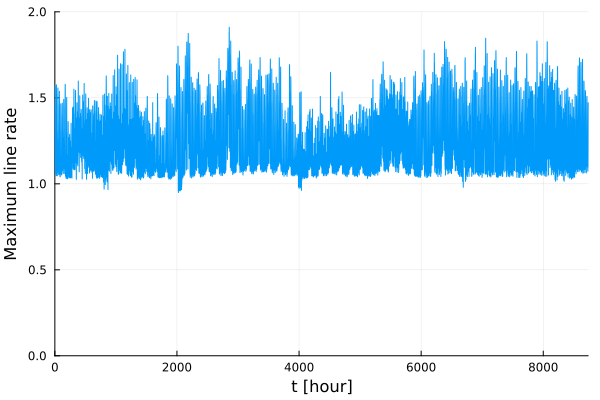

In [17]:
plot(max_rate_by_t, label="", xaxis="t [hour]", yaxis="Maximum line rate", legend=:bottomright,
    xlims=(0,8736), ylims=(0,2))

In [18]:
max_rate_by_line = dropdims(maximum(line_rates, dims=2), dims=2);

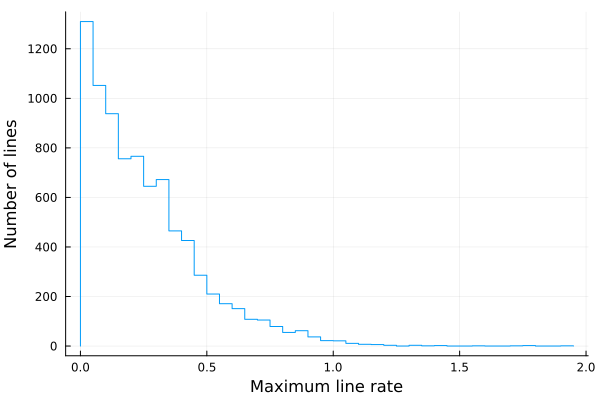

In [19]:
stephist(max_rate_by_line, label="", xaxis= "Maximum line rate", yaxis="Number of lines")

In [20]:
(highest_max_val, highest_max_t) = findmax(max_rate_by_t)
highest_max_line = findmax(max_rate_by_line)[2]
highest_max_val, highest_max_line, highest_max_t

(1.909937024003801, 6132, 2857)

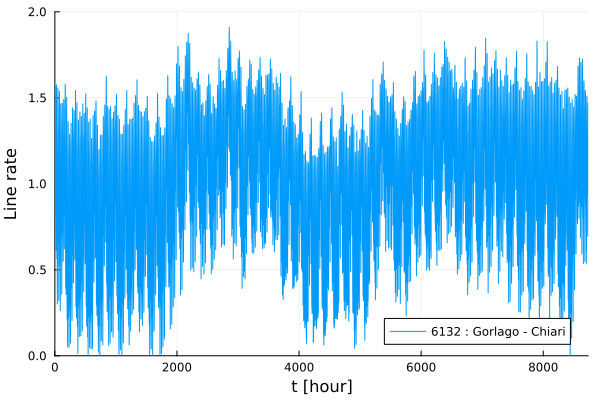

In [21]:
plot(line_rates[highest_max_line, :], label=line_info(highest_max_line), xaxis="t [hour]", yaxis="Line rate", legend=:bottomright,
    xlims=(0,8736), ylims=(0,2))

In [22]:
(lowest_max_val, lowest_max_t) = findmin(max_rate_by_t)
lowest_max_val, lowest_max_t

(0.9492428064931256, 2025)

### Average rate

In [23]:
avg_rate_by_t = dropdims(mean(line_rates, dims=1), dims=1);

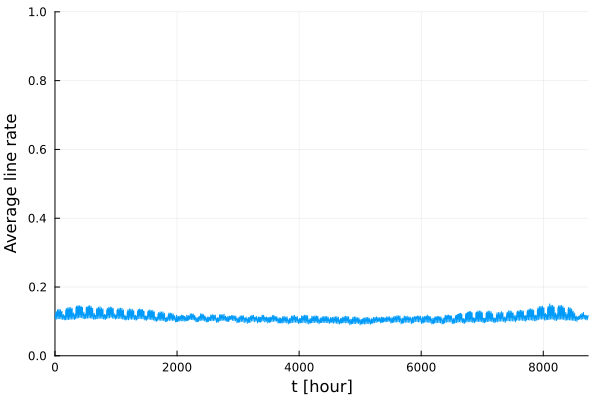

In [24]:
plot(avg_rate_by_t, label="", xaxis="t [hour]", yaxis="Average line rate", legend=:bottomright,
    xlims=(0,8736), ylims=(0,1))

In [25]:
avg_rate_by_line = dropdims(mean(line_rates, dims=2), dims=2);

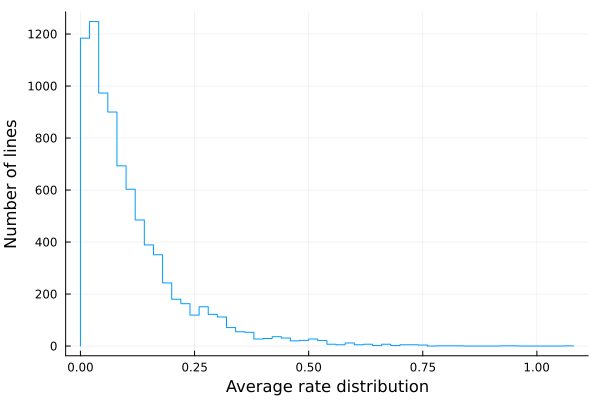

In [26]:
stephist(avg_rate_by_line, label="", xaxis="Average rate distribution", yaxis="Number of lines")

In [27]:
(highest_avg_val, highest_avg_line) = findmax(avg_rate_by_line)

(1.075549393253248, 594)

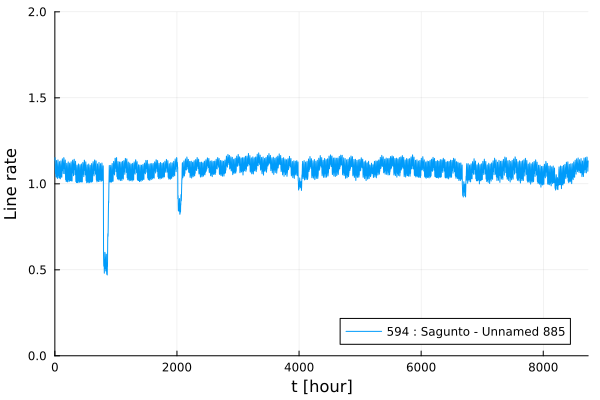

In [28]:
plot(line_rates[highest_avg_line, :], label=line_info(highest_avg_line), xaxis="t [hour]", yaxis="Line rate", legend=:bottomright,
    xlims=(0,8736), ylims=(0,2))

### Identify most problematic lines

In [29]:
max_rate_dict = Dict(line_ids .=> max_rate_by_line)
sort(max_rate_dict, byvalue=true, rev=true)

OrderedCollections.OrderedDict{String, Float64} with 8375 entries:
  "6132" => 1.90994
  "119"  => 1.78255
  "118"  => 1.78255
  "5585" => 1.73295
  "4940" => 1.59749
  "3227" => 1.43113
  "3310" => 1.43113
  "4184" => 1.38485
  "6027" => 1.34907
  "4957" => 1.32963
  "6029" => 1.32839
  "7184" => 1.23662
  "1184" => 1.21547
  "6114" => 1.21479
  "4398" => 1.1931
  "5976" => 1.18973
  "2658" => 1.18761
  "594"  => 1.17964
  "4834" => 1.16851
  "4498" => 1.15539
  "5569" => 1.13748
  "5568" => 1.13748
  "4149" => 1.13085
  "4150" => 1.13085
  "2659" => 1.12346
  ⋮      => ⋮

In [30]:
problematic_lines = [findfirst(==(id), line_ids) for (id, max_rate) in max_rate_dict if max_rate > 1.4]
line_info.(problematic_lines)

7-element Vector{String}:
 "6132 : Gorlago - Chiari"
 "4940 : Septemes - Realtor"
 "5585 : Avelin - Unnamed 1391"
 "3227 : Bentwisch - Unnamed 902"
 "3310 : Baltic 1 - Unnamed 902"
 "118 : Lavrio - Syros"
 "119 : Lavrio - Syros"

# Export model

In [31]:
function export_model(t, label)
    update_network!(network, collect(loads[t, :]), collect(gens[t, :]), collect(lines[t, :]))
    filename = "data/europe_$label.json"
    open(filename, "w") do f
        JSON.print(f, network) 
    end
    filename
end

export_model (generic function with 1 method)

In [32]:
export_model(highest_max_t, "high")

"data/europe_high.json"

In [33]:
export_model(lowest_max_t, "low")

"data/europe_low.json"